# How GOES the Fire Detection?
Jori Carter  
UW GDA Winter 2022  
Final Project  

## Part 1: Creating Geodataframes from WA DNR fire data

In [4]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

### Linking data and creating dataframe
Data is in a shapefile. 

In [41]:
wa_fires_fn = './wa_lrg_fires/wa_lrg_fires.shp'
wa_fires_src = gpd.read_file(wa_fires_fn)

### Bring in states outline and isolate Washington state
This is using the same data from class

In [42]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
#states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
states_gdf = gpd.read_file(states_url)
wa_gdf = states_gdf[states_gdf['NAME'] == 'Washington']

### Make sure that the CRS used by each dataframe match

In [43]:
wa_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
wa_fires_src.crs

<Derived Projected CRS: PROJCS["NAD83(HARN) / Washington South (ftUS)",GEO ...>
Name: NAD83(HARN) / Washington South (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
wa_fires_gdf = wa_fires_src.to_crs(epsg=4326)
wa_fires_gdf.crs == wa_gdf.crs

True

### Plot and inspect the data

AttributeError: 'Figure' object has no attribute 'set_aspect'

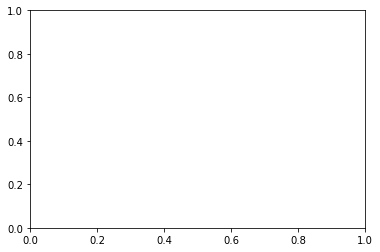

In [40]:
ax, fig = plt.subplots()
wa_gdf.plot(ax=ax, facecolor='none', edgecolor='k')
wa_fires_gdf.plot(column='YEAR', cmap='inferno');

### Limit fire data to 2018-2020 years

In [49]:
idx = wa_fires_gdf['YEAR'].isin([2018, 2019, 2020])
wa_fires_rec_gdf = wa_fires_gdf[idx]
wa_fires_rec_gdf

,UNITID,AGENCY,FIRENAME,FIRENUM,STARTDATE,PERIMDATE,ACRES,YEAR,CAUSE,SHAPE_AREA,SHAPE_LEN,geometry
573,WAWFS,WA FIRE SERVICE,LES BLAIR,136,2018-06-04,2018-06-06,905.728655,2018,UNKNOWN,3.945338e+07,36124.429104,"POLYGON ((-119.00301 45.99451, -119.00349 45.9..."
574,WASPD,SPOKANE BLM,SOAP LAKE,1282,2018-06-11,2018-06-14,2639.693642,2018,UNKNOWN,1.149846e+08,79677.367363,"POLYGON ((-119.46840 47.40127, -119.47126 47.4..."
575,WASES,WA DNR - SE REGION,MILEPOST TWENTY TWO,178,2018-06-20,2018-06-24,7596.787831,2018,HUMAN,3.309148e+08,76160.684183,"POLYGON ((-120.10307 46.97950, -120.07774 46.9..."
576,WAWFS,WA FIRE SERVICE,MONTECITO,227,2018-06-28,2018-06-29,1876.937761,2018,UNKNOWN,8.175908e+07,101232.591900,"POLYGON ((-119.78450 46.18975, -119.78387 46.1..."
577,WAWFS,WA FIRE SERVICE,EASTERDAY,193,2018-06-22,2018-06-23,1299.411609,2018,UNKNOWN,5.660214e+07,70434.094693,"POLYGON ((-119.08160 45.99784, -119.08047 45.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
807,WANES,WA DNR - NE REGION,RITCHEY,001060,2020-03-04,2020-03-10,11.079727,2020,RAILROAD,4.826310e+05,10199.061812,"POLYGON ((-117.71394 47.60912, -117.71394 47.6..."
808,WANES,WA DNR - NE REGION,HIGHWAY 27,001695,2020-07-24,2020-07-28,8.171272,2020,MISCELLANEOUS,3.559392e+05,8744.844518,"MULTIPOLYGON (((-117.21306 47.54402, -117.2130..."
809,WANES,WA DNR - NE REGION,SHORE ACRES,001804,2020-08-04,2020-08-13,18.092609,2020,LOGGING,7.881109e+05,4429.556762,"POLYGON ((-117.68836 48.01342, -117.68848 48.0..."
810,WANES,WA DNR - NE REGION,SHERMAN,001627,2020-07-16,2020-07-22,3.540164,2020,UNDER INVESTIGATION,1.542089e+05,2118.028091,"POLYGON ((-117.45175 47.52286, -117.45267 47.5..."


### Wow! 163 large fires in washington within those years

## Part 2: Select 3 fires to look at. 
There are a few criteria to consider: 
* Remoteness: fires that may have been hard to spot initially are good candidates
* Size: a few varied sizes would be preferrable
* Time: The fires should be visible from the satellites at their start times.

### Organize the fires by Region
Some custom classifications will be required here

### Organize the fires by Size
Simple descending list by acres will do

### Select 8 fires
Only 3 will be looked at in the analysis, but 8 will be selected and narrowed down based on best visibility

### Now a few fires have been selected!
#### It is now time to download the GOES data corresponding to these times

## Part 3: Downloading and Orthorectifying the GOES data

## Part 4: Basic Tests for GOES visibility
Here the 8 initial fires will be narrowed down to 3.

## Part 5: Overlaying the GOES rasters with DNR data

## Part 6: Checking Initial Detection with GOES